In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("space_server.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
feature_names = {"objid":"Object_Identifier","ra":"J2000 Right Ascension","dec":"J2000 Declination","u":"u","g":"g","r":"r","i":"i","z":"z","run":"Run_Number","rerun":"Rerun_Number","camcol":"Camera_column","field":"Field_number","specobjid":"Space_Object_Identifier","class":"object_class","redshift":"Final_Redshift","plate":"plate_number","mjd":"MJD_of_observation","fiberid":"fiber_ID"}
feature_names

{'objid': 'Object_Identifier',
 'ra': 'J2000 Right Ascension',
 'dec': 'J2000 Declination',
 'u': 'u',
 'g': 'g',
 'r': 'r',
 'i': 'i',
 'z': 'z',
 'run': 'Run_Number',
 'rerun': 'Rerun_Number',
 'camcol': 'Camera_column',
 'field': 'Field_number',
 'specobjid': 'Space_Object_Identifier',
 'class': 'object_class',
 'redshift': 'Final_Redshift',
 'plate': 'plate_number',
 'mjd': 'MJD_of_observation',
 'fiberid': 'fiber_ID'}

In [4]:
df.rename(index=str,columns=feature_names,inplace=True)
df.head()


,Object_Identifier,J2000 Right Ascension,J2000 Declination,u,g,r,i,z,Run_Number,Rerun_Number,Camera_column,Field_number,Space_Object_Identifier,object_class,Final_Redshift,plate_number,MJD_of_observation,fiber_ID
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object_Identifier        10000 non-null  float64
 1   J2000 Right Ascension    10000 non-null  float64
 2   J2000 Declination        10000 non-null  float64
 3   u                        10000 non-null  float64
 4   g                        10000 non-null  float64
 5   r                        10000 non-null  float64
 6   i                        10000 non-null  float64
 7   z                        10000 non-null  float64
 8   Run_Number               10000 non-null  int64  
 9   Rerun_Number             10000 non-null  int64  
 10  Camera_column            10000 non-null  int64  
 11  Field_number             10000 non-null  int64  
 12  Space_Object_Identifier  10000 non-null  float64
 13  object_class             10000 non-null  object 
 14  Final_Redshift           100

In [6]:

df.shape

(10000, 18)

In [7]:
df["Object_Identifier"].value_counts()


1.237650e+18    10000
Name: Object_Identifier, dtype: int64

In [8]:
df.drop("Object_Identifier",axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   J2000 Right Ascension    10000 non-null  float64
 1   J2000 Declination        10000 non-null  float64
 2   u                        10000 non-null  float64
 3   g                        10000 non-null  float64
 4   r                        10000 non-null  float64
 5   i                        10000 non-null  float64
 6   z                        10000 non-null  float64
 7   Run_Number               10000 non-null  int64  
 8   Rerun_Number             10000 non-null  int64  
 9   Camera_column            10000 non-null  int64  
 10  Field_number             10000 non-null  int64  
 11  Space_Object_Identifier  10000 non-null  float64
 12  object_class             10000 non-null  object 
 13  Final_Redshift           10000 non-null  float64
 14  plate_number             100

Text(0.5, 1.0, 'J2000 Right Ascension - Distplot')

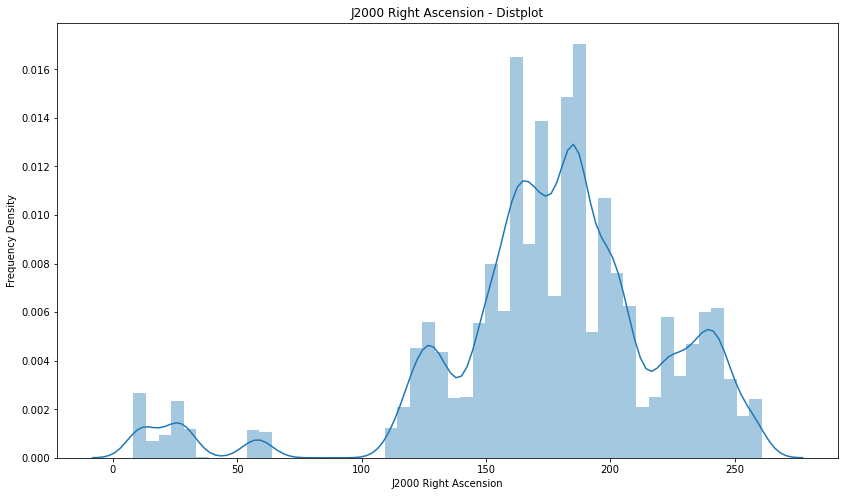

In [9]:

plt.figure(figsize=(14,8))
sns.distplot(df["J2000 Right Ascension"])
#plt.xticks(rotation = 90)
plt.xlabel('J2000 Right Ascension')
plt.ylabel('Frequency Density')
plt.title('J2000 Right Ascension - Distplot')

Text(0.5, 1.0, 'J2000 Declination - Distplot')

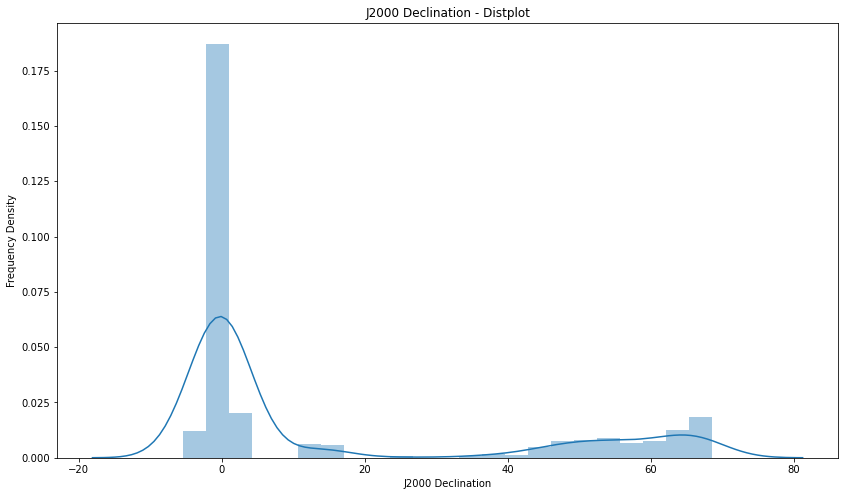

In [10]:
plt.figure(figsize=(14,8))
sns.distplot(df["J2000 Declination"])
#plt.xticks(rotation = 90)
plt.xlabel('J2000 Declination')
plt.ylabel('Frequency Density')
plt.title('J2000 Declination - Distplot')


Text(0.5, 1.0, 'Response of the u band of the telescope - Distplot')

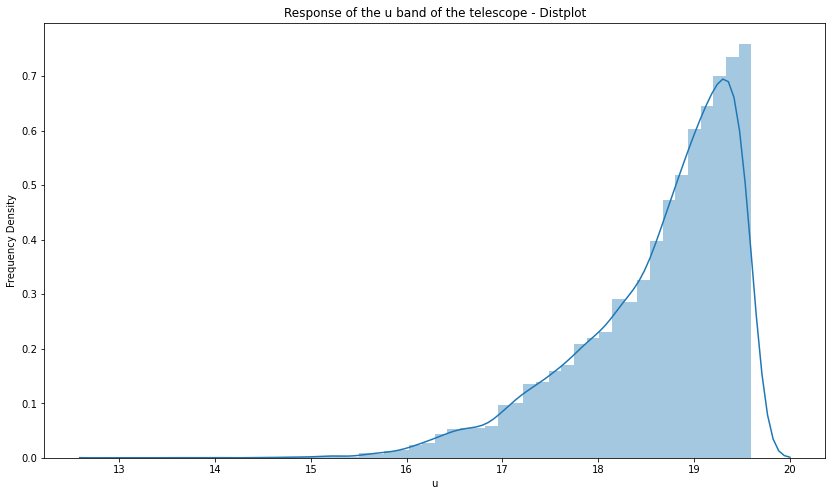

In [11]:

plt.figure(figsize=(14,8))
sns.distplot(df["u"])
#plt.xticks(rotation = 90)
plt.xlabel('u')
plt.ylabel('Frequency Density')
plt.title('Response of the u band of the telescope - Distplot')

Text(0.5, 1.0, 'Response of the g band of the telescope - Distplot')

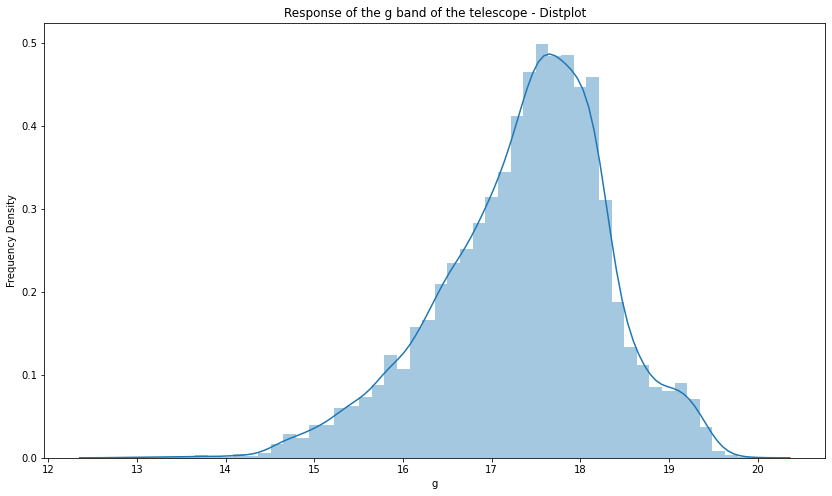

In [12]:

plt.figure(figsize=(14,8))
sns.distplot(df["g"])
#plt.xticks(rotation = 90)
plt.xlabel('g')
plt.ylabel('Frequency Density')
plt.title('Response of the g band of the telescope - Distplot')

Text(0.5, 1.0, 'Response of the r band of the telescope - Distplot')

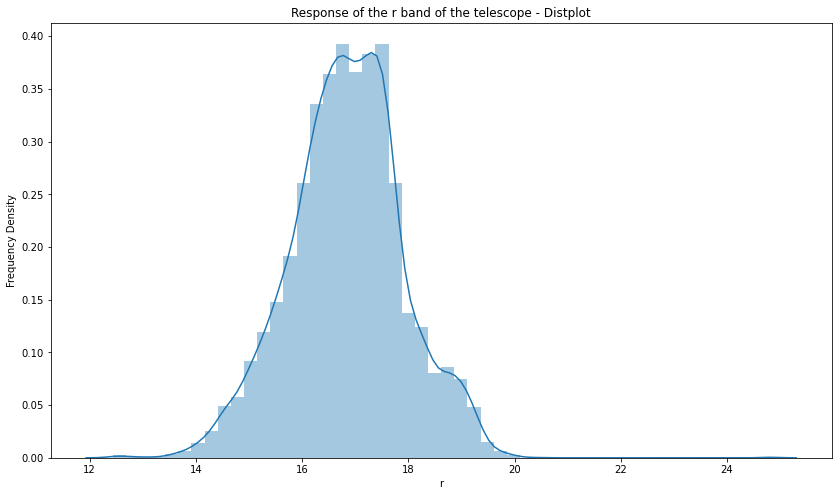

In [13]:

plt.figure(figsize=(14,8))
sns.distplot(df["r"])
#plt.xticks(rotation = 90)
plt.xlabel('r')
plt.ylabel('Frequency Density')
plt.title('Response of the r band of the telescope - Distplot')

Text(0.5, 1.0, 'Response of the i band of the telescope - Distplot')

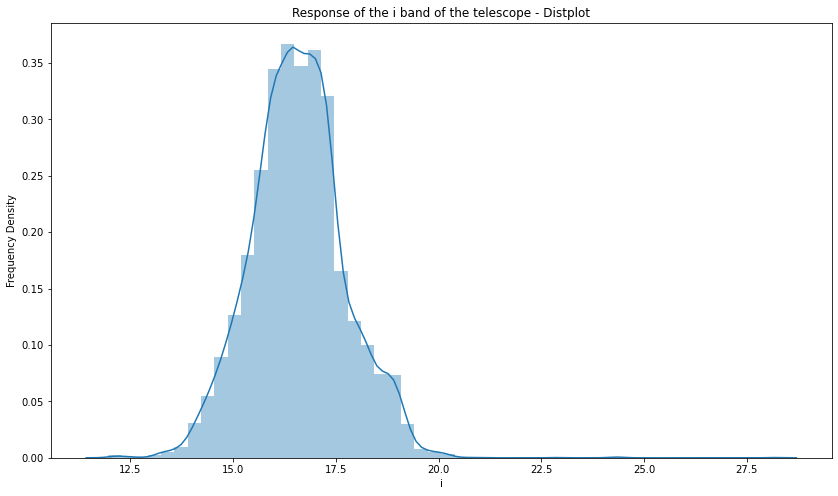

In [14]:
plt.figure(figsize=(14,8))
sns.distplot(df["i"])
#plt.xticks(rotation = 90)
plt.xlabel('i')
plt.ylabel('Frequency Density')
plt.title('Response of the i band of the telescope - Distplot')


Text(0.5, 1.0, 'Response of the z band of the telescope - Distplot')

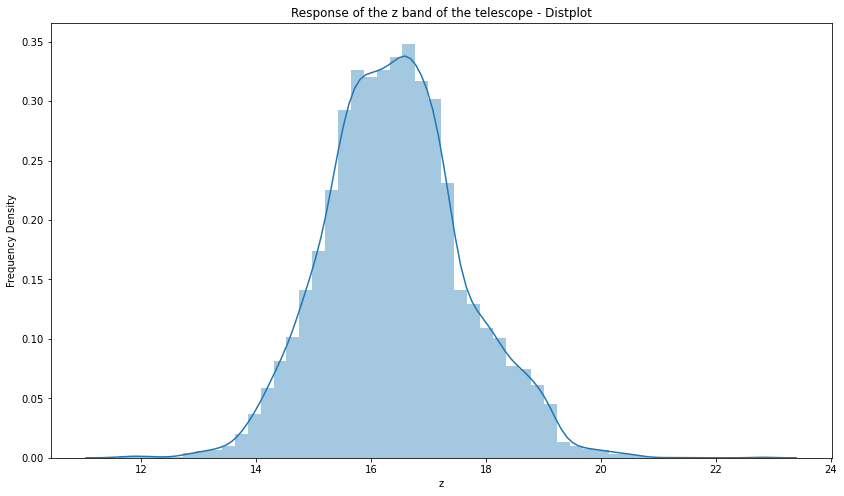

In [15]:

plt.figure(figsize=(14,8))
sns.distplot(df["z"])
#plt.xticks(rotation = 90)
plt.xlabel('z')
plt.ylabel('Frequency Density')
plt.title('Response of the z band of the telescope - Distplot')


In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   J2000 Right Ascension    10000 non-null  float64
 1   J2000 Declination        10000 non-null  float64
 2   u                        10000 non-null  float64
 3   g                        10000 non-null  float64
 4   r                        10000 non-null  float64
 5   i                        10000 non-null  float64
 6   z                        10000 non-null  float64
 7   Run_Number               10000 non-null  int64  
 8   Rerun_Number             10000 non-null  int64  
 9   Camera_column            10000 non-null  int64  
 10  Field_number             10000 non-null  int64  
 11  Space_Object_Identifier  10000 non-null  float64
 12  object_class             10000 non-null  object 
 13  Final_Redshift           10000 non-null  float64
 14  plate_number             100

Text(0.5, 1.0, 'Run_Number - Distplot')

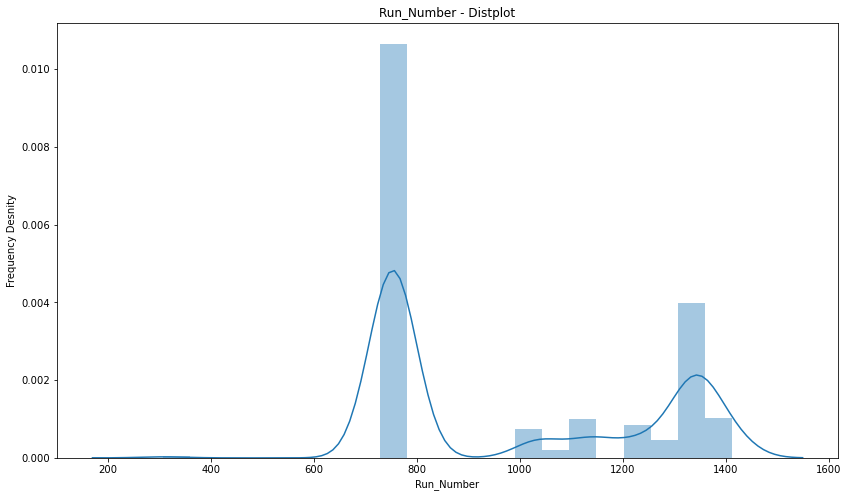

In [17]:

plt.figure(figsize=(14,8))
sns.distplot(df["Run_Number"])
#plt.xticks(rotation = 90)
plt.xlabel('Run_Number')
plt.ylabel('Frequency Desnity')
plt.title('Run_Number - Distplot')

In [18]:
df["Rerun_Number"].value_counts()

301    10000
Name: Rerun_Number, dtype: int64

In [19]:
cor = df[["J2000 Right Ascension","J2000 Declination","u","g","r","i","z","Run_Number","Field_number","Final_Redshift","plate_number","fiber_ID"]].corr()
cor

,J2000 Right Ascension,J2000 Declination,u,g,r,i,z,Run_Number,Field_number,Final_Redshift,plate_number,fiber_ID
J2000 Right Ascension,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,0.594700,0.030307,-0.095329,0.057485
J2000 Declination,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,-0.131471,0.067021,0.088342,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.008548,0.163741,-0.129430,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.014651,0.407576,-0.054981,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.017133,0.441080,0.019787,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.019781,0.431450,0.072958,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.018248,0.424034,0.112397,0.067980
Run_Number,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,-0.463898,0.059056,0.093601,0.138566
Field_number,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,1.000000,0.015414,-0.093723,-0.040493
Final_Redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,0.059056,0.015414,1.000000,-0.038091,0.046532


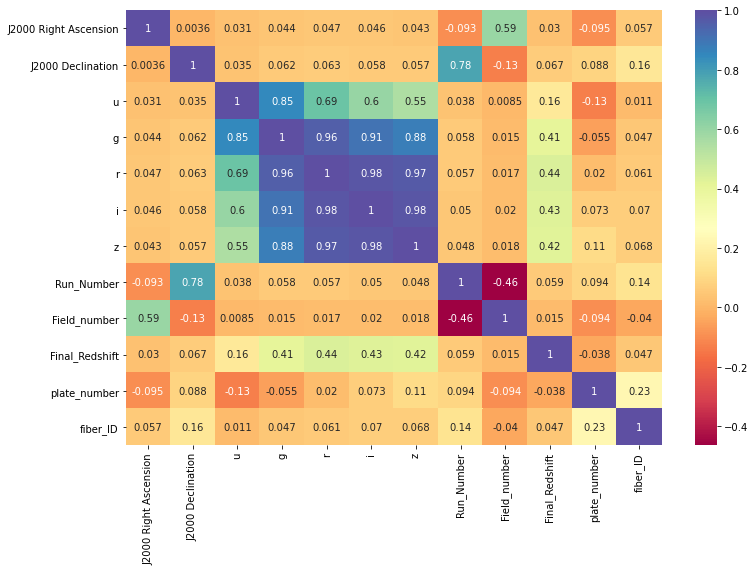

In [20]:

plt.figure(figsize=(12,8))
sns.heatmap(cor,cmap='Spectral',annot=True)

In [21]:
df.isnull().sum()

J2000 Right Ascension      0
J2000 Declination          0
u                          0
g                          0
r                          0
i                          0
z                          0
Run_Number                 0
Rerun_Number               0
Camera_column              0
Field_number               0
Space_Object_Identifier    0
object_class               0
Final_Redshift             0
plate_number               0
MJD_of_observation         0
fiber_ID                   0
dtype: int64

In [22]:
df.skew()

J2000 Right Ascension     -1.227350
J2000 Declination          1.191544
u                         -1.219795
g                         -0.536293
r                         -0.021673
i                          0.286442
z                          0.214313
Run_Number                 0.412555
Rerun_Number               0.000000
Camera_column             -0.100220
Field_number               0.249795
Space_Object_Identifier    1.794627
Final_Redshift             4.265729
plate_number               1.794609
MJD_of_observation         1.039610
fiber_ID                   0.308053
dtype: float64

In [23]:
df.head()

,J2000 Right Ascension,J2000 Declination,u,g,r,i,z,Run_Number,Rerun_Number,Camera_column,Field_number,Space_Object_Identifier,object_class,Final_Redshift,plate_number,MJD_of_observation,fiber_ID
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["object_class"] = le.fit_transform(df["object_class"].astype('str'))
df.head()

,J2000 Right Ascension,J2000 Declination,u,g,r,i,z,Run_Number,Rerun_Number,Camera_column,Field_number,Space_Object_Identifier,object_class,Final_Redshift,plate_number,MJD_of_observation,fiber_ID
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [25]:

X=df.drop("object_class", axis=1)
y=df["object_class"]


In [26]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 0.16745842, -0.58492272,  1.03148637, ...,  1.03148936,
         1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, ..., -0.63621258,
        -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796, ..., -0.65633905,
        -0.60919097,  0.77527888],
       ...,
       [-0.92039468,  1.46090664,  0.16753826, ...,  3.26608697,
         2.69309363,  1.3036668 ],
       [-0.92197294,  1.46432109,  0.31801835, ..., -0.56688806,
        -0.70581092, -0.60143828],
       [-0.91804124,  1.46639319,  0.79229193, ..., -0.56688806,
        -0.70581092, -0.5820479 ]])

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (10000, 16)
Reduced shape: (10000, 2)


In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state

In [29]:
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 57 is 0.9816


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=57)



In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [48]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
GNB = GaussianNB()

SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()



In [49]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))

models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))

In [51]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=57, shuffle=True)


***************** LogisticRegression ******************

LogisticRegression()


Accuracy Score =  0.9816


Cross val score =  0.4998


Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1271
           1       1.00      0.94      0.97       222
           2       0.97      0.99      0.98      1007

    accuracy                           0.98      2500
   macro avg       0.98      0.97      0.98      2500
weighted avg       0.98      0.98      0.98      2500



Confusion Matrix 
[[1244    1   26]
 [  13  209    0]
 [   6    0 1001]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier ******************

KNeighborsClassifier()


Accuracy Score =  0.9168


Cross val score =  0.7846


Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1271
           1       0.98      0.85      0.91       222
           2 

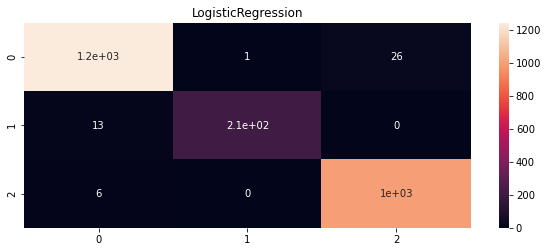

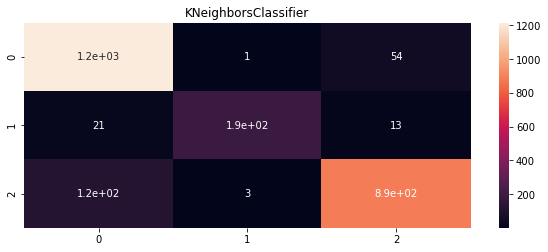

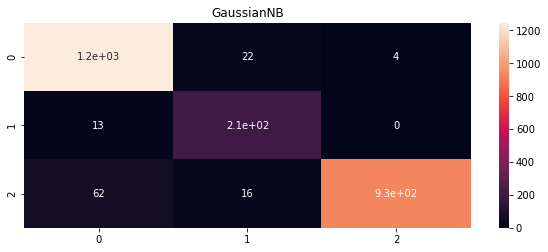

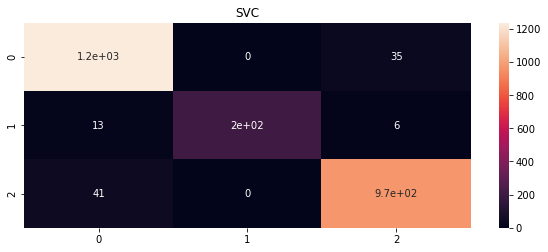

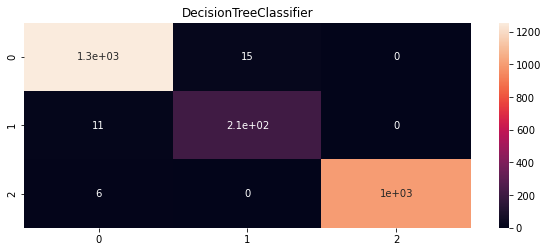

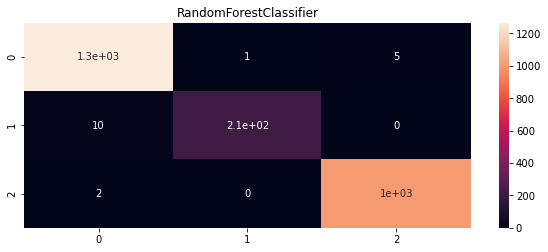

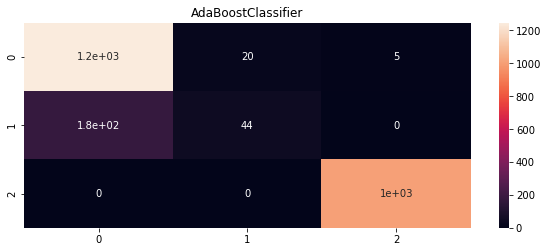

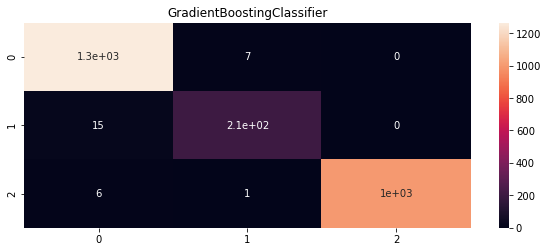

In [52]:
Model = []
score = []
cvs = []

for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
  
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
   
    print("\n\n")


In [53]:

result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs})
result

,Model,Accuracy Socre,Cross val score
0,LogisticRegression,98.16,49.98
1,KNeighborsClassifier,91.68,78.46
2,GaussianNB,95.32,79.65
3,SVC,96.20,79.68
4,DecisionTreeClassifier,98.72,98.54
5,RandomForestClassifier,99.28,98.84
6,AdaBoostClassifier,91.88,89.54
7,GradientBoostingClassifier,98.84,98.84
